<a href="https://colab.research.google.com/github/astrd/07_Redes_Neuronales/blob/main/Proyecto_DavidGonz%C3%A1lez%2BAstridGamoneda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación**

## **Estrategia 2: Red pre-entrenada**

### **1. Carga y acondicionamiento del conjunto de datos**
Dataset: https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset

#### *1.1. Descarga del dataset desde la plataforma kaggle*

In [1]:
#Cargamos el fichero de autenticación de kaggle
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
#Descargamos el dataset
!kaggle datasets download -d misrakahmed/vegetable-image-dataset

vegetable-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
#Descomprimimos el dataset
!unzip vegetable-image-dataset.zip

Archive:  vegetable-image-dataset.zip
replace Vegetable Images/test/Bean/0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#### *1.2 Carga del dataset y acondicionamiento de datos*
1. Utilizamos el generador para mayor eficiencia en la carga de datos
2. Utilizamos el parametro class_mode='categorical' para realizar One-hot encoding
3. Con el parámetro rescale=1./255 normalizamos para disminuir el coste computacional


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import imagenet_utils


# Definir los directorios de los conjuntos de datos
train_dir = 'Vegetable Images/train'
test_dir = 'Vegetable Images/test'
val_dir = 'Vegetable Images/validation'

# Definir el tamaño de imagen que se utilizará para el modelo
img_size = (75,75)

# Definir el generador de datos para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.inception_v3.preprocess_input)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=64,
        class_mode='categorical')

# Definir el generador de datos para el conjunto de prueba
test_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.inception_v3.preprocess_input)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=64,
        class_mode='categorical')

# Definir el generador de datos para el conjunto de validación
val_datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.inception_v3.preprocess_input)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=img_size,
        batch_size=64,
        class_mode='categorical')

# Obtener los datos y las etiquetas de los generadores de datos
x_train, y_train = test_generator.next()
x_test, y_test = test_generator.next()
x_val, y_val = val_generator.next()



Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
print(train_generator.samples)
print(x_train.shape)
print(x_train[0])

15000
(64, 75, 75, 3)
[[[ 0.5764706   0.5921569   0.5058824 ]
  [ 0.64705884  0.654902    0.6156863 ]
  [ 0.6392157   0.6392157   0.6392157 ]
  ...
  [ 0.62352943  0.6         0.56078434]
  [ 0.6627451   0.6392157   0.58431375]
  [ 0.6392157   0.6156863   0.56078434]]

 [[ 0.5529412   0.54509807  0.5294118 ]
  [ 0.54509807  0.5372549   0.5058824 ]
  [ 0.5921569   0.6         0.5372549 ]
  ...
  [ 0.7254902   0.7019608   0.6627451 ]
  [ 0.7019608   0.6784314   0.62352943]
  [ 0.7254902   0.7019608   0.64705884]]

 [[ 0.56078434  0.62352943  0.5372549 ]
  [ 0.5137255   0.58431375  0.43529415]
  [ 0.34901965  0.427451    0.21568632]
  ...
  [ 0.6784314   0.67058825  0.6313726 ]
  [ 0.654902    0.64705884  0.60784316]
  [ 0.6784314   0.67058825  0.6313726 ]]

 ...

 [[-0.23921567 -0.08235294 -0.64705884]
  [-0.27843136 -0.1372549  -0.62352943]
  [-0.2862745  -0.14509803 -0.6       ]
  ...
  [ 0.12941182  0.2941177  -0.16862744]
  [ 0.11372554  0.2313726  -0.19999999]
  [ 0.12941182  0.1921

### **2. Inspección del conjunto de datos**

In [5]:
import matplotlib.pyplot as plt

# Definir el generador de datos para el conjunto de entrenamiento
visual_datagen = ImageDataGenerator(rescale=1./255)
visual_generator = visual_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=64,
        class_mode='categorical')

x_visual, y_visual = visual_generator.next()

Found 15000 images belonging to 15 classes.


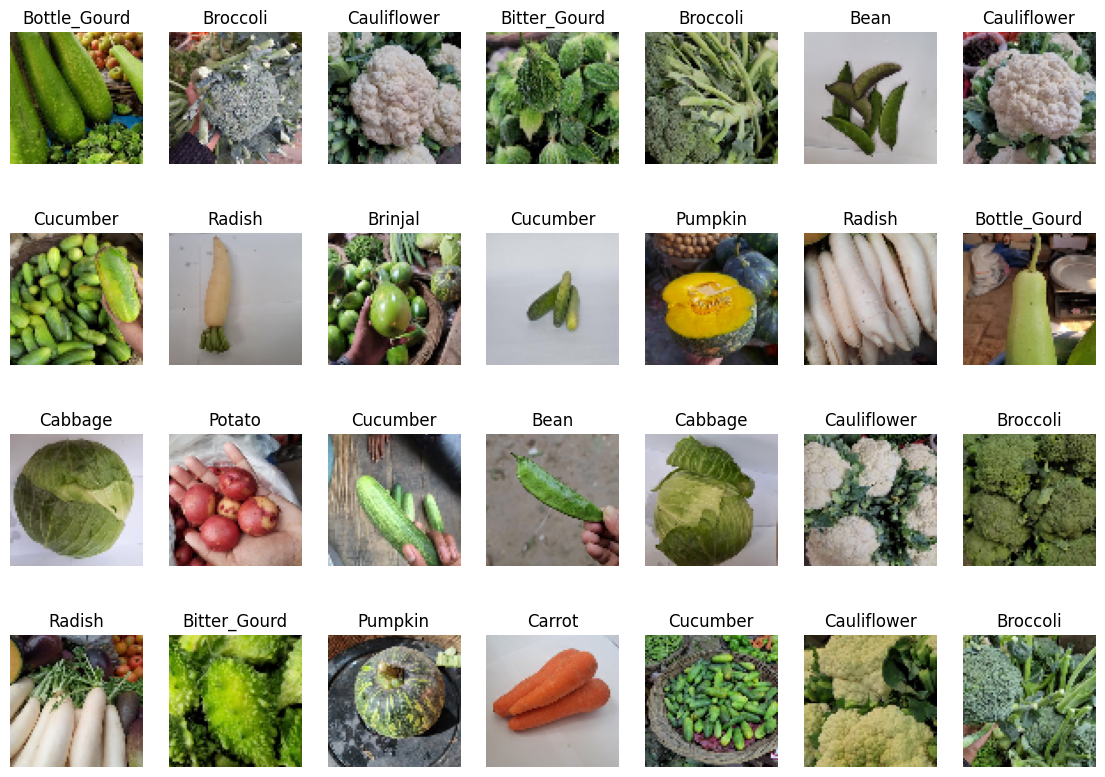

In [6]:


# Obtener la lista de nombres de las clases
class_names = list(visual_generator.class_indices.keys())

fig = plt.figure(figsize=(14,10))
for n in range(1, 29):
    fig.add_subplot(4, 7, n)
    img = x_visual[n]
    plt.imshow(img)
    plt.axis('off')
    # Agregar el título de la clase correspondiente
    label_index = y_visual[n].argmax()
    plt.title(class_names[label_index])
plt.show()


### **3. Desarrollo de la arquitectura de red neuronal y entrenamiento de la solución**

In [7]:
from tensorflow.keras.applications import InceptionV3, ResNet50

base_model = InceptionV3(include_top=False,
    weights="imagenet",
    pooling='avg',
    input_shape=(75,75,3))

#base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[

In [8]:
# conectarlo a nueva parte densa
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16, imagenet_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras import Model
from tensorflow.keras import regularizers
import numpy as np

base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING

# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output 

x = Flatten()(last) 
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='fc1')(x) 
x = BatchNormalization()(x) 
# x = Dropout(0.25)(x) 
x = Dense(15, activation='softmax', name='predictions')(x) 
model = Model(base_model.input, x) 

In [9]:
# Compilamos el modelo
model.compile(optimizer=optimizers.SGD(0.001), loss='categorical_crossentropy', metrics=['accuracy']) 

# Vamos a visualizar el modelo prestando especial atención en el número de pesos total y el número de pesos entrenables.
#model.summary() 

# Entrenamos el modelo 
H = model.fit(train_generator, validation_data = val_generator, steps_per_epoch = int(train_generator.samples / 64), epochs=20) 

# # Evaluación del modelo
# print("[INFO]: Evaluando el modelo...")
# predictions = model.predict(, batch_size=64) 
# # Obtener el report de clasificación
# print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames)) 


Epoch 1/20
234/234 [==============================] - 49s 179ms/step - loss: 2.9196 - accuracy: 0.3611 - val_loss: 2.2621 - val_accuracy: 0.5717
Epoch 2/20
234/234 [==============================] - 30s 129ms/step - loss: 2.0249 - accuracy: 0.6415 - val_loss: 1.8693 - val_accuracy: 0.6993
Epoch 3/20
234/234 [==============================] - 31s 134ms/step - loss: 1.7495 - accuracy: 0.7305 - val_loss: 1.6966 - val_accuracy: 0.7487
Epoch 4/20
234/234 [==============================] - 31s 131ms/step - loss: 1.6020 - accuracy: 0.7762 - val_loss: 1.5861 - val_accuracy: 0.7800
Epoch 5/20
234/234 [==============================] - 30s 126ms/step - loss: 1.5031 - accuracy: 0.8068 - val_loss: 1.5123 - val_accuracy: 0.7990
Epoch 6/20
234/234 [==============================] - 30s 129ms/step - loss: 1.4333 - accuracy: 0.8307 - val_loss: 1.4547 - val_accuracy: 0.8150
Epoch 7/20
234/234 [==============================] - 30s 130ms/step - loss: 1.3770 - accuracy: 0.8452 - val_loss: 1.4126 - val_ac

In [10]:
import matplotlib.pyplot as plt
def plot_history(history):
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()
  plt.show()

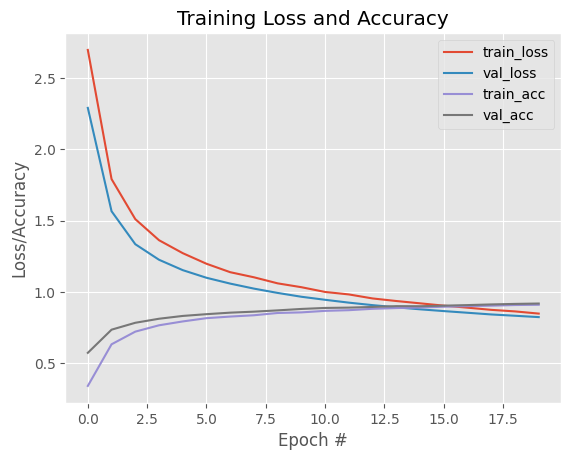

In [32]:
plot_history(H)

### **4. Monitorización del proceso de entrenamiento para la toma de decisiones**

### **5. Evaluación del modelo predictivo y planteamiento de la siguiente prueba experimental**

In [34]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 6.9 MB/s eta 0:00:00


Aqui creamos los metodos para la busqueda de hiperparamatros para optimizar la busqueda

In [46]:
import tensorflow as tf
import IPython
import keras_tuner as kt

class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

EarlyStoppingCallback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.001,
    patience=2,
    verbose=0,
    mode='auto',
    restore_best_weights=True,
    start_from_epoch=10
)


def model_builder(hp, base_model):
  
  base_model.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING

  # Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
  last = base_model.layers[-1].output 

  x = Flatten()(last) 
  hp_weight = hp.Choice('weight_regularization', values = [1e-2, 1e-3, 1e-4]) 
  x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(hp_weight), name='fc1')(x) 
  x = BatchNormalization()(x) 
  hp_dropout = hp.Choice('dropout', values = [0.0, 0.1, 0.2])
  x = Dropout(hp_dropout)(x) 
  x = Dense(15, activation='softmax', name='predictions')(x) 
  model = Model(base_model.input, x) 

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
  model.compile(optimizer=optimizers.SGD(hp_learning_rate), loss='categorical_crossentropy', metrics=['accuracy']) 

  return model


In [66]:
def hyperparameter_trial(tuner):
  tuner.search(train_generator, validation_data = val_generator, steps_per_epoch = int(train_generator.samples / 64), epochs=20,
              callbacks = [ClearTrainingOutput(), EarlyStoppingCallback])

  # Get the optimal hyperparameters
  best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

  print(f"""
  The hyperparameter search is complete. The optimal learning rate for the optimizer
  is {best_hps.get('learning_rate')}. The optimal dropout is {best_hps.get('dropout')}. The 
  optimal weight regularization is {best_hps.get('weight_regularization')}
  """)


Busqueda de hiperparametros de la arquitectura InceptionV3

In [51]:
base_model_hp = InceptionV3(include_top=False,
                    weights="imagenet",
                    pooling='avg',
                    input_shape=(75,75,3))
 

tuner = kt.Hyperband(lambda hp: model_builder(hp, base_model_hp),
                     objective='val_accuracy',
                     max_epochs=20,
                     seed=42) 
hyperparameter_trial(tuner)

In [58]:
hyperparameter_trial(tuner)

Trial 15 Complete [00h 02m 39s]
val_accuracy: 0.9316666722297668

Best val_accuracy So Far: 0.9383333325386047
Total elapsed time: 00h 29m 36s

Search: Running Trial #16

Value             |Best Value So Far |Hyperparameter
0.001             |0.01              |weight_regularization
0                 |0.1               |dropout
0.001             |0.01              |learning_rate
7                 |7                 |tuner/epochs
3                 |3                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
1                 |1                 |tuner/round
0000              |0003              |tuner/trial_id

Epoch 4/7
234/234 [==============================] - 36s 137ms/step - loss: 1.6221 - accuracy: 0.7681 - val_loss: 1.5836 - val_accuracy: 0.7827
Epoch 5/7
234/234 [==============================] - 30s 129ms/step - loss: 1.5161 - accuracy: 0.8010 - val_loss: 1.5096 - val_accuracy: 0.8057
Epoch 6/7
234/234 [==============================] - 30s 128ms/st

KeyboardInterrupt: ignored

### **Estrategia 2: Segunda Arquitectura - VGG**

Hemos decidido usar VGG como segunda arquitectura con el tamaño de imagen de 75 y basado en los pesos de imagenet

In [11]:
from keras.applications.vgg16 import VGG16, preprocess_input

# Load the pre-trained VGG16 model
base_model_vgg = VGG16(include_top=False,
    weights="imagenet",
    pooling='avg',
    input_shape=(75,75,3))



Aqui lo conectamos a la parte densa y añadimos el weight regularizacion, dropout y batch normalization

In [12]:
# conectarlo a nueva parte densa
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16, imagenet_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras import Model
from tensorflow.keras import regularizers
import numpy as np

base_model_vgg.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING

# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model_vgg.layers[-1].output 

x = Flatten()(last) 
#weight regularation
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='fc1')(x) 
#batch normalization
x = BatchNormalization()(x) 
#dropout
x = Dropout(0.15)(x)
x = Dense(15, activation='softmax', name='predictions')(x) 
modeloVGG = Model(base_model_vgg.input, x) 

compilamos el modelo

In [13]:
#learning rate = 0.001
modeloVGG.compile(optimizer=optimizers.SGD(0.001), loss='categorical_crossentropy', metrics=['accuracy']) 

# Vamos a visualizar el modelo prestando especial atención en el número de pesos total y el número de pesos entrenables.
#model.summary() 

# Entrenamos el modelo 
historyVGG = modeloVGG.fit(train_generator,
              validation_data = val_generator,
              steps_per_epoch = int(train_generator.samples / 64),
              epochs=20) 


Epoch 1/20
234/234 [==============================] - 38s 152ms/step - loss: 2.7420 - accuracy: 0.3208 - val_loss: 2.3316 - val_accuracy: 0.5490
Epoch 2/20
234/234 [==============================] - 30s 128ms/step - loss: 1.8418 - accuracy: 0.6083 - val_loss: 1.6215 - val_accuracy: 0.7137
Epoch 3/20
234/234 [==============================] - 30s 127ms/step - loss: 1.5526 - accuracy: 0.7017 - val_loss: 1.3742 - val_accuracy: 0.7730
Epoch 4/20
234/234 [==============================] - 29s 125ms/step - loss: 1.4001 - accuracy: 0.7511 - val_loss: 1.2544 - val_accuracy: 0.8097
Epoch 5/20
234/234 [==============================] - 29s 124ms/step - loss: 1.2954 - accuracy: 0.7793 - val_loss: 1.1743 - val_accuracy: 0.8250
Epoch 6/20
234/234 [==============================] - 29s 126ms/step - loss: 1.2222 - accuracy: 0.8022 - val_loss: 1.1169 - val_accuracy: 0.8410
Epoch 7/20
234/234 [==============================] - 30s 126ms/step - loss: 1.1601 - accuracy: 0.8174 - val_loss: 1.0687 - val_ac

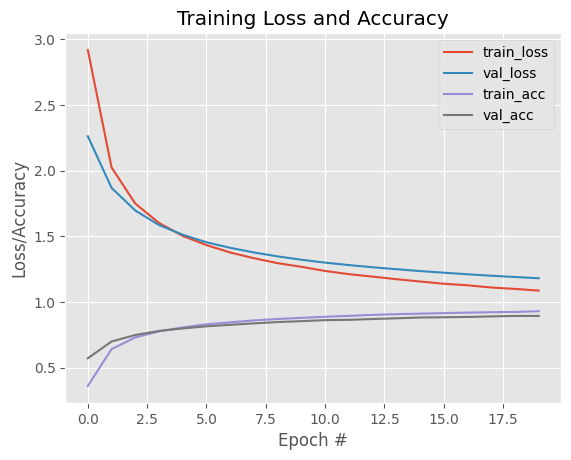

In [14]:
plot_history(historyVGG)

Busqueda de hiperparametros optimos


In [83]:

base_model_vgg_hb = VGG16(include_top=False,
    weights="imagenet",
    pooling='avg',
    input_shape=(75,75,3))

tuner_VGG = kt.Hyperband(lambda hp: model_builder(hp, base_model_vgg_hb),
                     objective='val_accuracy',
                     max_epochs=20,
                     seed=42,
                     overwrite=True) 
hyperparameter_trial(tuner_VGG)

Trial 4 Complete [00h 01m 54s]
val_accuracy: 0.9313333630561829

Best val_accuracy So Far: 0.9313333630561829
Total elapsed time: 00h 08m 00s

Search: Running Trial #5

Value             |Best Value So Far |Hyperparameter
0.01              |0.01              |weight_regularization
0.1               |0.1               |dropout
0.0001            |0.01              |learning_rate
3                 |3                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/3
 97/234 [===========>..................] - ETA: 13s - loss: 8.3970 - accuracy: 0.0777

KeyboardInterrupt: ignored

Despues de ejecutar estos hiperparametros encontramos un mejor valor de accuracy de 0.9313333630561829 y weight_regularization= 0.01, dropout=0.1
,learning_rate= 0.01

In [ ]:
# conectarlo a nueva parte densa
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16, imagenet_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras import Model
from tensorflow.keras import regularizers
import numpy as np

base_model_vgg_hb.trainable = False # Evitar que los pesos se modifiquen en la parte convolucional -> TRANSFER LEARNING

# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model_vgg_hb.layers[-1].output 

x = Flatten()(last) 
#weight regularation = 0.01
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01), name='fc1')(x) 
#batch normalization
x = BatchNormalization()(x) 
#dropout 0.1
x = Dropout(0.1)(x)
x = Dense(15, activation='softmax', name='predictions')(x) 
modeloVGG_hb = Model(base_model_vgg_hb.input, x) 

In [ ]:
#learning rate = 0.01
modeloVGG_hb.compile(optimizer=optimizers.SGD(0.01), loss='categorical_crossentropy', metrics=['accuracy']) 

# Vamos a visualizar el modelo prestando especial atención en el número de pesos total y el número de pesos entrenables.
#model.summary() 

# Entrenamos el modelo 
historyVGG_hb = modeloVGG_hb.fit(train_generator,
              validation_data = val_generator,
              steps_per_epoch = int(train_generator.samples / 64),
              epochs=20) 

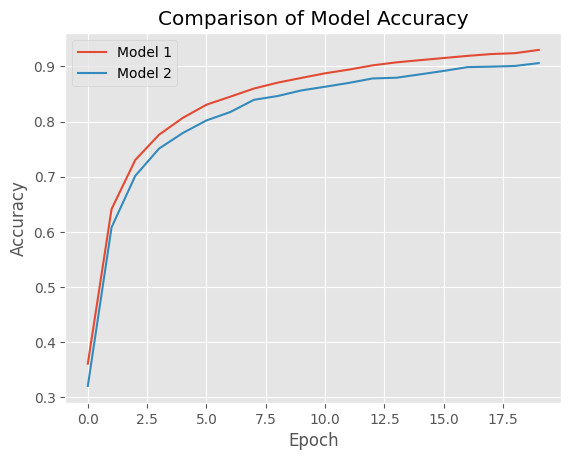

In [16]:
import matplotlib.pyplot as plt

# Plot the accuracy of the first model
plt.plot(H.history['accuracy'], label='Model 1')

# Plot the accuracy of the second model
plt.plot(historyVGG.history['accuracy'], label='Model 2')

# Add legend, title and axis labels
plt.legend()
plt.title('Comparison of Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Show the plot
plt.show()
